In [60]:
import matplotlib.pyplot as plt
from IPython.display import Latex
from ipywidgets import interactive, interact, fixed
%pylab inline --no-import-all


Populating the interactive namespace from numpy and matplotlib


In [68]:
from scipy.integrate import odeint, ode
from scipy import sqrt, linspace, cos, sin, pi, arctan,arcsin
from scipy.optimize import root
from numpy import rad2deg, square,array

In [12]:
def fresnel(ni=1.,nt=1.4):
    ti=linspace(0,pi/2,50);
    cos_t=sqrt(1.-(square(ni/nt*sin(ti))));
    rs=(ni*cos(ti)-nt*cos_t)/(ni*cos(ti)+nt*cos_t);
    rp=(ni*cos_t-nt*cos(ti))/(ni*cos_t+nt*cos(ti))
    ts=(2*ni*cos(ti))/(ni*cos(ti)+nt*cos_t);
    tp=(2*ni*cos(ti))/(ni*cos_t+nt*cos(ti));

    return (ti,rs,ts,rp,tp)

In [13]:
def RT(ni=1,nt=1.5):
    ti,rs,ts,rp,tp = fresnel(ni,nt)
    RS=rs*rs
    RP=rp*rp
    TP=1.-RP
    TS=1.-RS
    return(ti,RS,TS,RP,TP)

In [105]:
def plotRT(ni=1.,nt=1.5):
    ti,RS,TS,RP,TP=RT(ni,nt)
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (16, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}
    # Update the global rcParams dictionary with the new parameter choices
# Before doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)
    
    Angle=arctan(nt/ni)*180/pi  #
    print(Angle)
    # Make the new figure with new formatting
    fig, axes = plt.subplots(1,2)

    axes[0].plot(rad2deg(ti), RS, label ='Rs')
    axes[0].plot(rad2deg(ti),TS, label= 'Ts')
    axes[1].plot(rad2deg(ti), RP, label='Rp')
    axes[1].plot(rad2deg(ti),TS,label='Tp')
  
    axes[0].legend()
    axes[1].legend()
    axes[1].annotate(r'Brewsters Angle= %.1f$^{\circ}$'%Angle, xy=(Angle, 0),  xycoords='data',
                xytext=(-50, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->")
                )
    if ni>nt:
        thetac=rad2deg(arcsin(nt/ni))
       
        axes[1].axvspan(rad2deg(thetac), 90, hatch='\\', facecolor='g', alpha=0.5)
        axes[0].axvspan(rad2deg(thetac), 90,hatch='\\',  facecolor='g', alpha=0.5)

    plt.rcParams.update(rcdef)       
    plt.rcParams.update(rcdef)

In [108]:
def plotfresnel(ni=1.,nt=1.5):
    ti,rs,ts,rp,tp=fresnel(ni,nt)
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (16, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}
    # Update the global rcParams dictionary with the new parameter choices
# Before doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)
    
    
    # Make the new figure with new formatting
    fig, axes = plt.subplots(1,2)

    axes[0].plot(rad2deg(ti), rs, label ='rs')
    axes[0].plot(rad2deg(ti),ts, label= 'ts')
    
    axes[1].plot(rad2deg(ti), rp, label='rp')
    axes[1].plot(rad2deg(ti),tp,label='tp')

    axes[0].legend()
    axes[1].legend()
    if ni>nt:
        thetac=rad2deg(arcsin(nt/ni))
        print(thetac)
        axes[1].axvspan(thetac, 90, hatch='\\', facecolor='g', alpha=0.5)
        axes[0].axvspan(thetac, 90,hatch='\\',  facecolor='g', alpha=0.5)

    plt.rcParams.update(rcdef)       
    plt.rcParams.update(rcdef)

61.9275130641


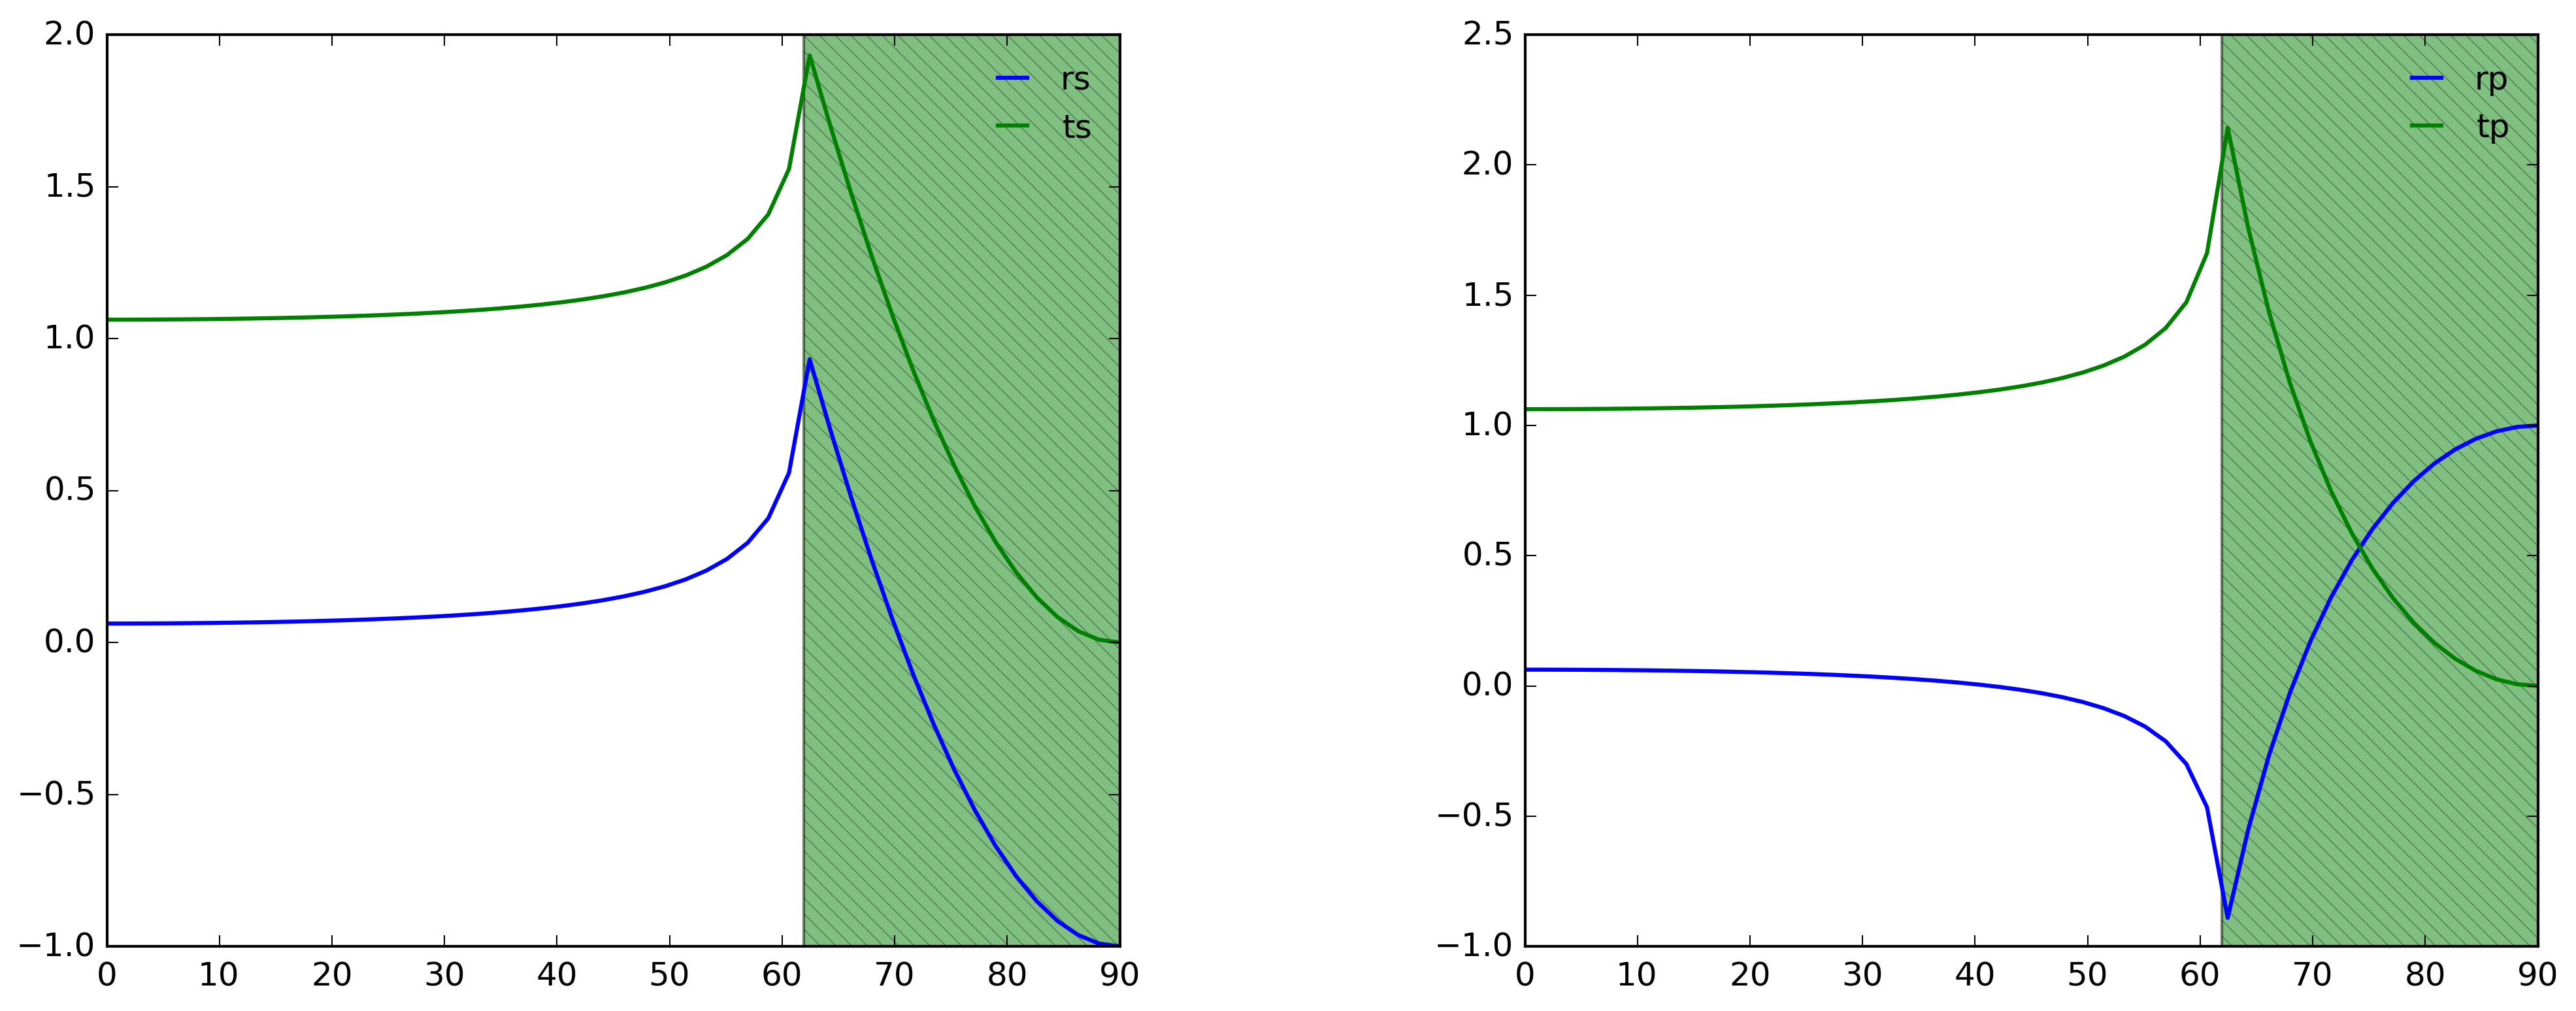

In [109]:
interact(plotfresnel,ni=(1.,10.),nt=(1.,10.),continuous_update=False);


56.309932474


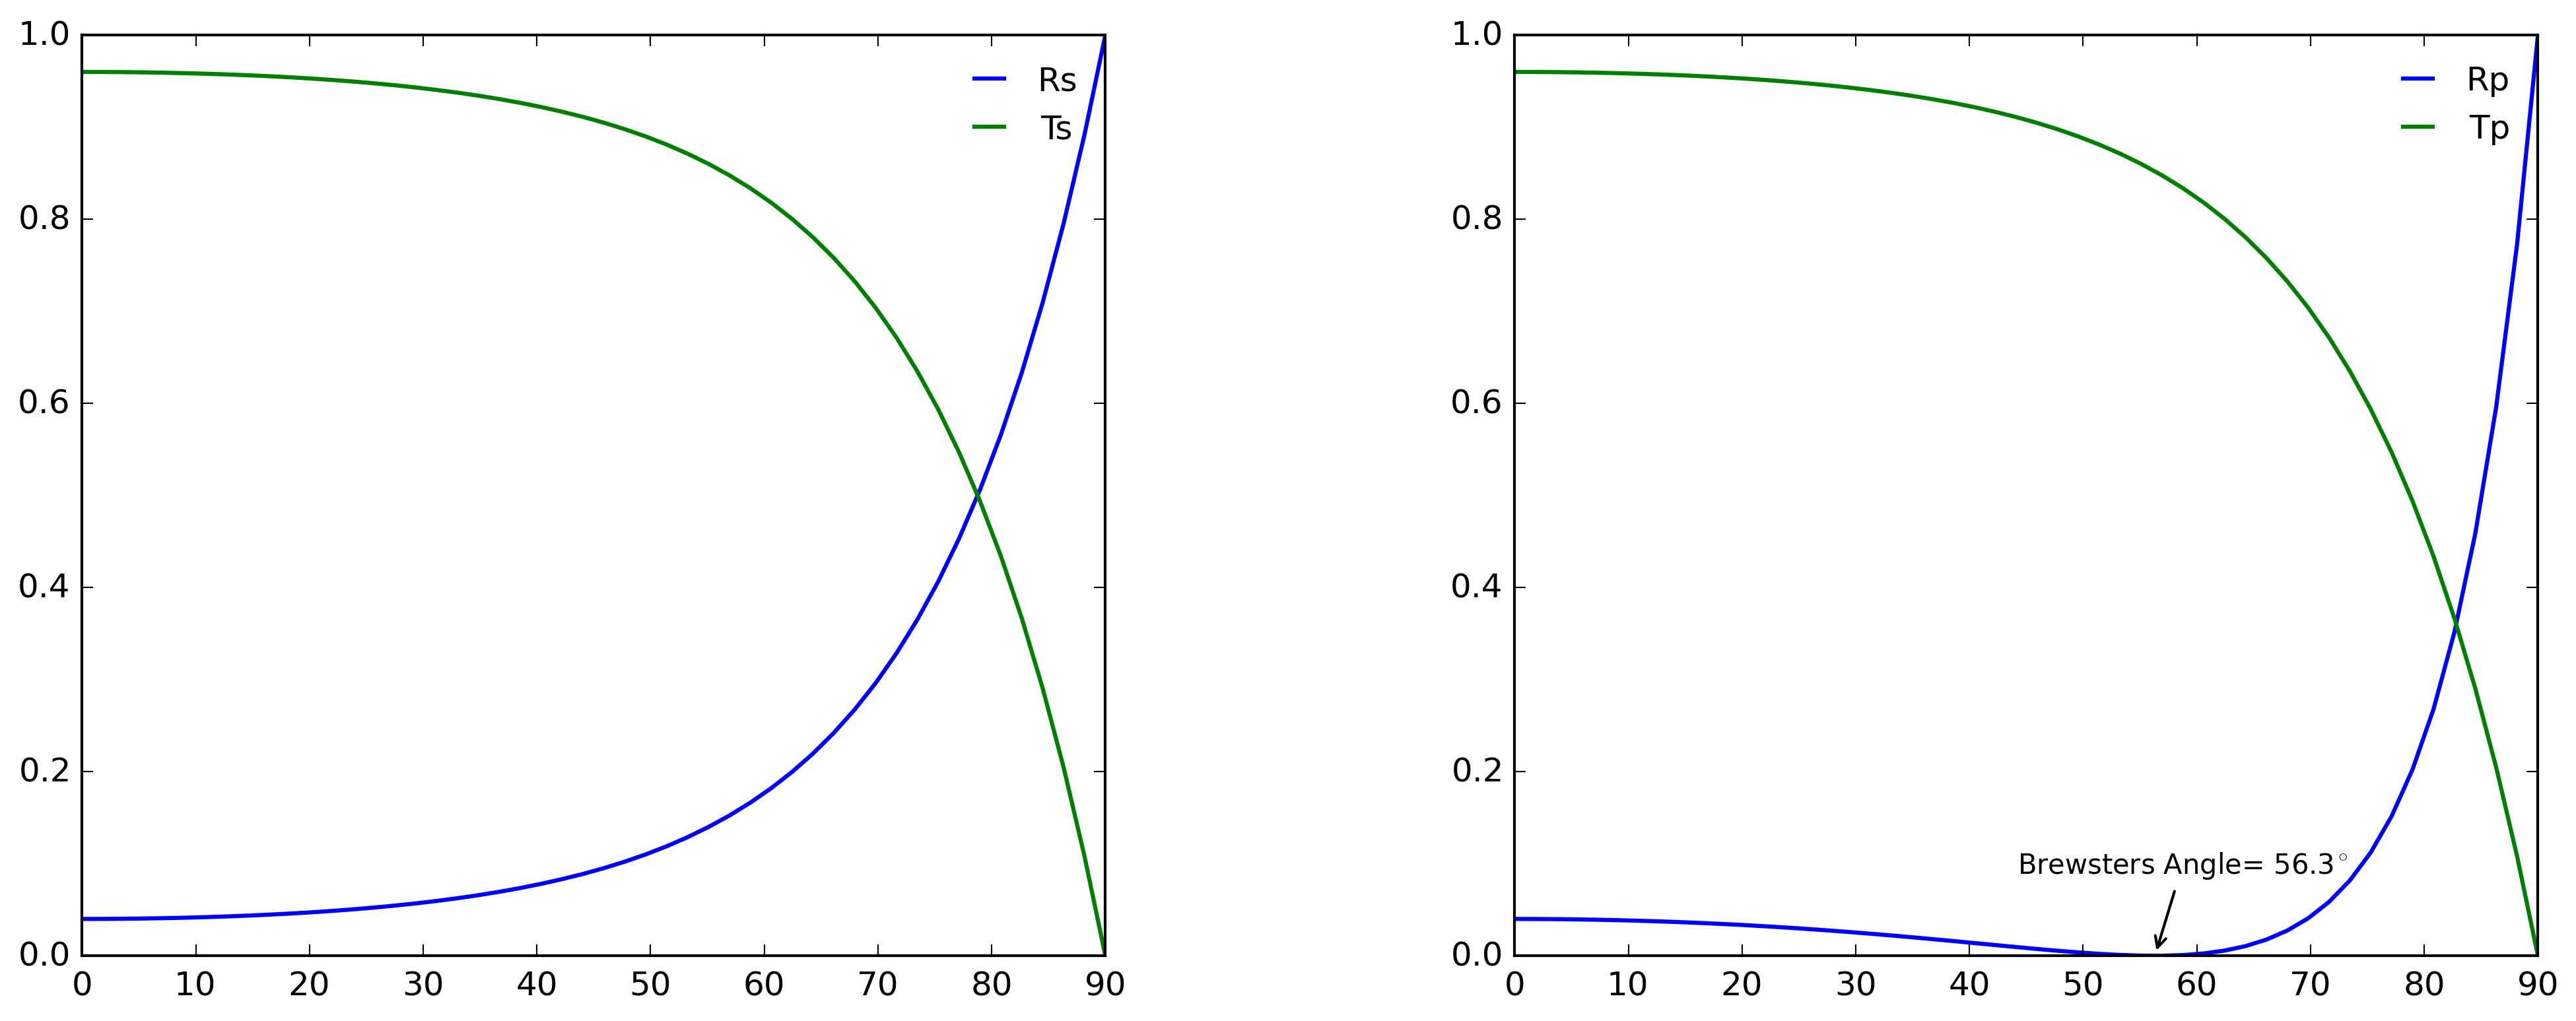

In [104]:
interact(plotRT,ni=(1.,10),nt=(1.,10));

# Let's plot our own reflection data.

In [61]:
def plotRData(RpA, RpD, RsA, RsD,ni=1.,nt=1.5):
    ti,RS,TS,RP,TP=RT(ni,nt)
   
    rcdef = plt.rcParams.copy()
    newparams = {'axes.labelsize': 14, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.5, 'figure.figsize': (16, 6),
             'figure.subplot.wspace': 0.4,
             'ytick.labelsize': 12, 'xtick.labelsize': 12,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 12, 'legend.frameon': False, 
             'legend.handlelength': 1.5}
    # Update the global rcParams dictionary with the new parameter choices
# Before doing this, we reset rcParams to its default again, just in case
    plt.rcParams.update(rcdef)
    plt.rcParams.update(newparams)
    
    Angle=arctan(nt/ni)*180/pi  #
    print(Angle)
    # Make the new figure with new formatting
    fig, axes = plt.subplots(1,2)

    axes[0].plot(rad2deg(ti), RS, label ='Rs')
    axes[0].plot(RsA,RsD,'*')
    axes[1].plot(rad2deg(ti), RP, label='Rp')
    axes[1].plot(RpA,RpD,'*')

    axes[0].legend()
    axes[1].legend()
    axes[1].annotate(r'Brewsters Angle= %.1f$^{\circ}$'%Angle, xy=(Angle, 0),  xycoords='data',
                xytext=(-50, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->")
                )

    plt.rcParams.update(rcdef)       
    plt.rcParams.update(rcdef)

Fill in your Angles and Reflection Data into the appropriate arrays below and 

53.8592310136


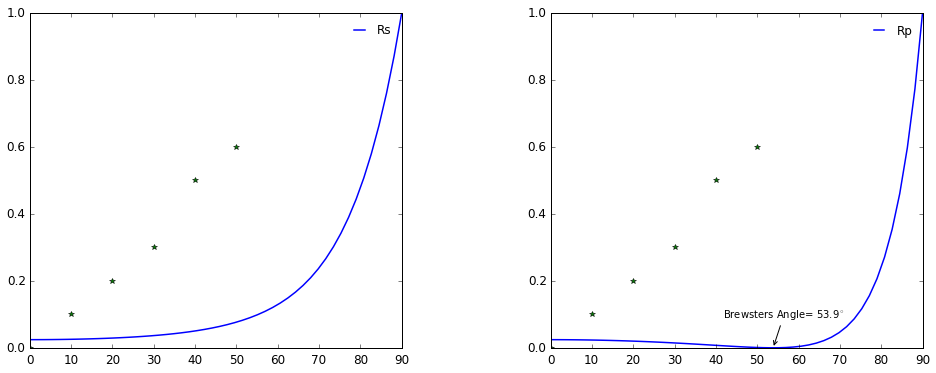

In [62]:
RpAngles=array([0,10,20,30,40,50])*1.
RpData=array([.0,.1,.2,.3,.5,.6])
RsAngles=array([0,10,20,30,40,50])*1.    
RsData=array([.0,.1,.2,.3,.5,.6])
interact(plotRData,ni=(1.,5,.01),nt=(1.,5,.01),RpA=fixed(RpAngles), RpD=fixed(RpData),RsA=fixed(RsAngles), RsD=fixed(RsData));